# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Feature Engineering - Different Techniques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Outlier Detection

## 1.1 IQR Method

In [ ]:
df = pd.read_csv('weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [ ]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [ ]:
## convert height in inches to cm
df.Height = [height*2.54 for height in df.Height]
df.head()

Gender      Height      Weight
0   Male  187.571423  241.893563
1   Male  174.706036  162.310473
2   Male  188.239668  212.740856
3   Male  182.196685  220.042470
4   Male  177.499761  206.349801

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

## 

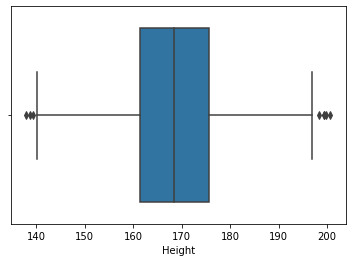

In [ ]:
## ploting boxplot to check outliers
sns.boxplot(x=df['Height'])
plt.show()

In [ ]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [ ]:
## checking outlier
df[(df.Height < lowerlimit)  | (df.Height > upperlimit)]

Gender      Height      Weight
994     Male  198.363503  255.690835
1317    Male  199.293614  227.342565
2014    Male  200.656806  269.989699
3285    Male  199.461654  253.889004
3757    Male  199.698290  245.733783
6624  Female  138.726819   71.393749
7294  Female  139.379268   78.606670
9285  Female  137.828359   64.700127

In [ ]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = df[(df.Height > lowerlimit) & (df.Height < upperlimit)]
df1.shape

(9992, 3)

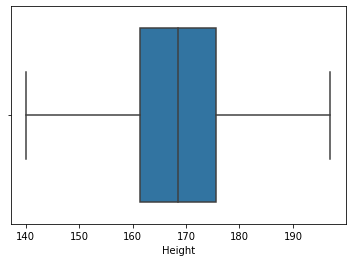

In [ ]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Height'])
plt.show()

## 1.2. Standard Deviation method

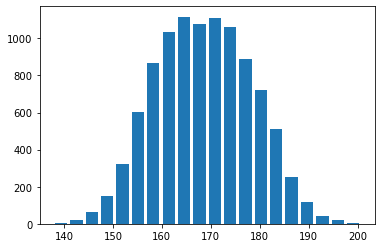

In [ ]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.show()

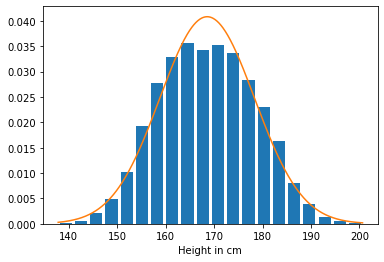

In [ ]:
from scipy.stats import norm 
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height in cm')
rang = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rang, norm.pdf(rang,df.Height.mean(),df.Height.std()))
plt.show()

In [ ]:
# drop outliers which falls beyond 3 standard deviation range
std = df.Height.std()
std

9.772721426763994

In [ ]:
mean = df.Height.mean()
mean

168.57360177724604

In [ ]:
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)

In [ ]:
df[(df.Height<lowerlimit) | (df.Height>upperlimit)]

Gender      Height      Weight
994     Male  198.363503  255.690835
1317    Male  199.293614  227.342565
2014    Male  200.656806  269.989699
3285    Male  199.461654  253.889004
3757    Male  199.698290  245.733783
6624  Female  138.726819   71.393749
9285  Female  137.828359   64.700127

In [ ]:
df2 = df[(df.Height>lowerlimit) & (df.Height<upperlimit)]
df2.shape

(9993, 3)

# 2. Transformation

In [ ]:
loandf = pd.read_csv("loan_train.csv")
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

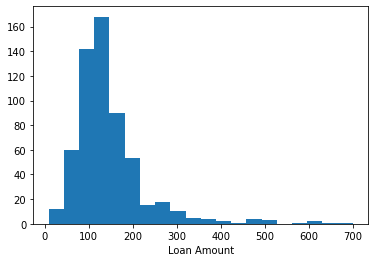

In [ ]:
plt.hist(loandf.LoanAmount,bins=20)
plt.xlabel("Loan Amount")
plt.show()

## 2.1. Log Transformation

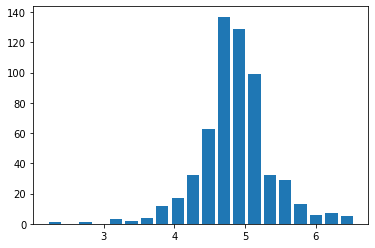

In [ ]:
# Apply log transformation
x = np.log(loandf['LoanAmount'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## 2.2. Reciprocal transformation

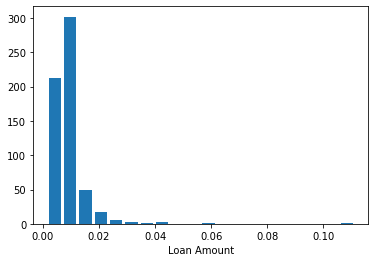

In [ ]:
# x = 1/loandf.LoanAmount
x = np.reciprocal(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.3. Square root Transformation

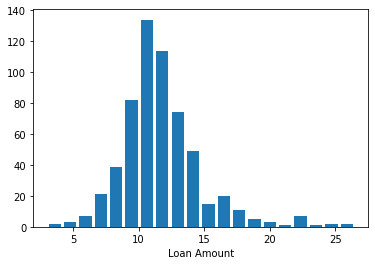

In [ ]:
# x = loandf.LoanAmount ** (1/2)
x = np.sqrt(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.4. Cube root Transformation

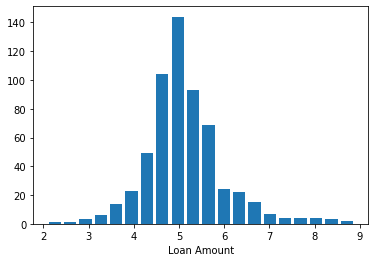

In [ ]:
# x = loandf.LoanAmount ** (1/3)
x = np.cbrt(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.5 Exponential Transformation

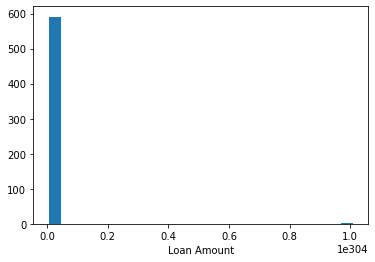

In [ ]:
x = np.exp(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

# 3. Feature Scaling

## 3.1. MinMax Scaler

In [ ]:
loandf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
numeric_columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
numericdf = loandf[numeric_columns]


In [ ]:
numericdf.isna().sum()

ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [ ]:
numericdf.bfill(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# Dataframe before scaling
numericdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0             5849       128.0             360.0             1.0
1             4583       128.0             360.0             1.0
2             3000        66.0             360.0             1.0
3             2583       120.0             360.0             1.0
4             6000       141.0             360.0             1.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [ ]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.070489    0.172214           0.74359             1.0
1         0.054830    0.172214           0.74359             1.0
2         0.035250    0.082489           0.74359             1.0
3         0.030093    0.160637           0.74359             1.0
4         0.072356    0.191027           0.74359             1.0

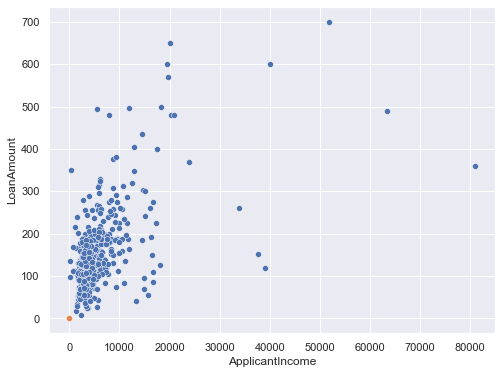

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=loandf,x='ApplicantIncome',y='LoanAmount')
sns.scatterplot(data = transformdf,x='ApplicantIncome',y='LoanAmount')
plt.show()

## 3.2. Standard Scaler

`class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)`

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numericdf)

In [ ]:
standardf = pd.DataFrame(numeric,columns=numeric_columns)
standardf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.072991   -0.217057          0.273231        0.433152
1        -0.134412   -0.217057          0.273231        0.433152
2        -0.393747   -0.947774          0.273231        0.433152
3        -0.462062   -0.311343          0.273231        0.433152
4         0.097728   -0.063843          0.273231        0.433152

## 3.3. Robust Scaler


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(numericdf)

In [ ]:
robustdf = pd.DataFrame(numeric,columns=numeric_columns)
robustdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.698029    0.000000               0.0             0.0
1         0.264096    0.000000               0.0             0.0
2        -0.278492   -0.928839               0.0             0.0
3        -0.421422   -0.119850               0.0             0.0
4         0.749786    0.194757               0.0             0.0

# 4. Encoding Categorical variables

In [ ]:
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## 4.1. One-Hot Encoding using Pandas get_dummies()

In [ ]:
loandf.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
categorical_columns=["Gender",'Married']
cdf = loandf[categorical_columns]
cdf.head()

Gender Married
0   Male      No
1   Male     Yes
2   Male     Yes
3   Male     Yes
4   Male      No

In [ ]:
#creating dummy variables for nominal categorical variable using get_dummies()
categorical_columns=["Gender",'Married']
cdf = loandf[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head()

Gender_Female  Gender_Male  Married_No  Married_Yes
0              0            1           1            0
1              0            1           0            1
2              0            1           0            1
3              0            1           0            1
4              0            1           1            0

## 4.2. One-Hot Encoding 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = ohe.fit_transform(loandf[['Education']]).toarray()
categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 4.3. Ordinal Encoder (Ordinal data)

In [ ]:
ndf = pd.read_csv("HR_comma_sep.csv")
ndf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()
ndf['salary'] = oe.fit_transform(ndf[['salary']])
ndf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     1.0  
1     2.0  
2     2.0  
3     1.0  
4     1.0

## 4.4. Label Encoder

In [ ]:
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
loandf['Loan_Status'] = le.fit_transform(loandf.Loan_Status)
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1

# 5. Feature Selection

## 5.1. Correlation based (Multicoliinearity)

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
bdf = pd.DataFrame(data=boston.data,columns=boston.feature_names)
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

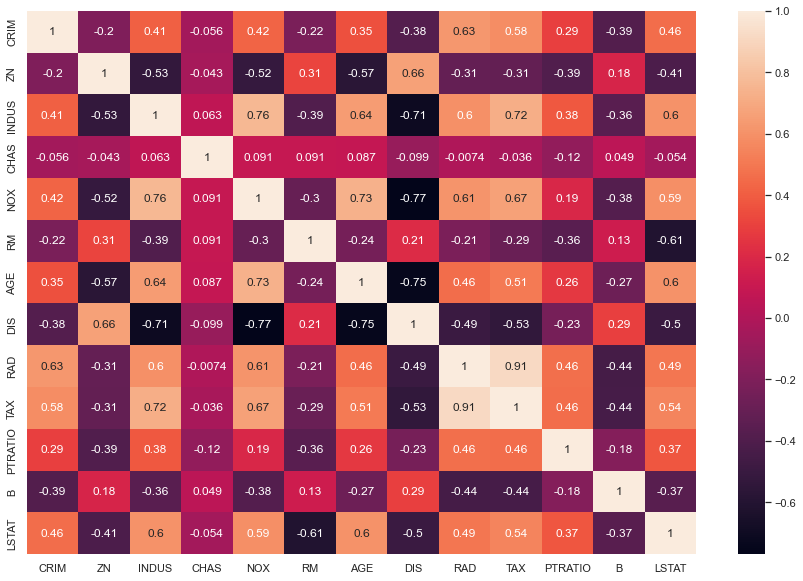

In [ ]:
corr = bdf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [ ]:
corr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
def correlation_matrix(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation_matrix(bdf,0.7)
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [ ]:
newdf = bdf.drop(corr_features,axis = 1)
newdf.head()

CRIM    ZN  INDUS  CHAS     RM  RAD  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  6.575  1.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  6.421  2.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  7.185  2.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  6.998  3.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  7.147  3.0     18.7  396.90   5.33

## 5.2 Univariate feature selection using SelectKBest 

### 5.2.1. Pearson's Correlation Coefficient

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.
`class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)`

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=10)

#apply feature selection
X_selected = fs.fit_transform(bdf,boston.target)

In [ ]:
X_selected.shape

(506, 10)

### 5.2.2. ANOVA F Measure

In [ ]:
iris = datasets.load_iris()
idf = pd.DataFrame(data=iris.data,columns=iris.feature_names)
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif,k=3)
X_selected = fs.fit_transform(idf,iris.target)
X_selected.shape

(150, 3)

### 5.2.3. Chi-squared test to select K Best features

In [ ]:
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2,k=8)
X_selected = fs.fit_transform(X,y)


# HomeWork (TODO 5)

Apply different feature engineering techniques covered today to loan prediction problem and train your model again.